In [1]:
%pip install timm
%pip install torch==1.10.0

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 748.8 MB 5.5 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0
    Uninstalling torch-1.10.0:
      Successfully uninstalled torch-1.10.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mmdet 2.3.0rc0+c6b5ca2 requires Pillow<=6.2.2, but you have pillow 9.1.0 which is incompatible.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 881.9 MB 5.5 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.6.0
    Uninstal

In [2]:
CONFIG_PATH = './configs/for_handwritten_names/base-ViTSTR-for-handwritten-names.json'
DEVICE = 'cuda'

### Обучение модели

INFO: DEVICE is cuda

Loading pre-trained vision transformer weights from https://dl.fbaipublicfiles.com/deit/deit_base_patch16_224-b5f2ef4d.pth ...

Validation	acc: 0.0000, wer: 1.0012, cer: 10.4524, loop_time: 0m 17s

Epoch 0, Loss: 1.45554, cer: 0.9576, LR: 0.0003721, loop_time: 5m 51s

Validation	acc: 0.0000, wer: 1.0002, cer: 0.9800, loop_time: 0m 16s
Model weights saved

Epoch 1, Loss: 0.57842, cer: 0.7609, LR: 0.0009089, loop_time: 6m 3s

Validation	acc: 0.0000, wer: 1.0005, cer: 0.4995, loop_time: 0m 16s

Epoch 2, Loss: 0.47913, cer: 0.4194, LR: 0.0009988, loop_time: 5m 54s

Validation	acc: 0.0000, wer: 1.0006, cer: 0.4094, loop_time: 0m 16s

Epoch 3, Loss: 0.38673, cer: 0.3743, LR: 0.0009890, loop_time: 5m 55s

Validation	acc: 0.0000, wer: 1.0017, cer: 0.6964, loop_time: 0m 16s

Epoch 4, Loss: 0.35597, cer: 0.4030, LR: 0.0009698, loop_time: 5m 55s

Validation	acc: 0.0000, wer: 0.9820, cer: 0.2728, loop_time: 0m 16s

Epoch 5, Loss: 0.33282, cer: 0.2991, LR: 0.0009414, loop_time

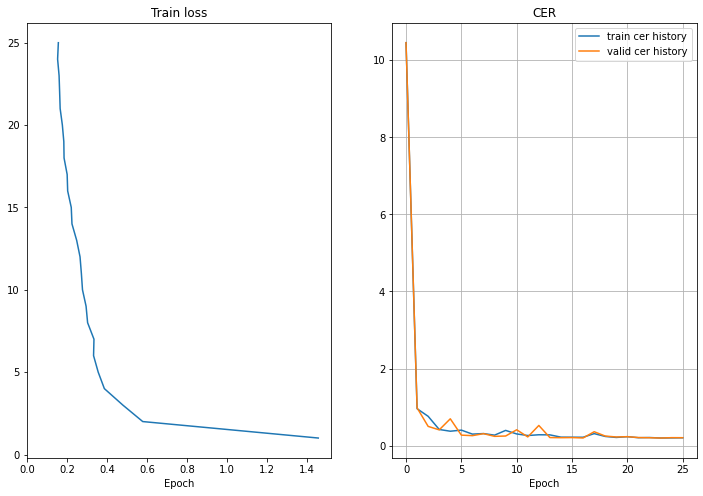

<Figure size 432x288 with 0 Axes>

In [4]:
#!g1.1
%run train.py --config_path "{CONFIG_PATH}"

### Тестирование модели

In [5]:
import cv2
import random

from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

from utils.predictor import OcrPredictor
from utils.config import Config

In [6]:
config = Config(CONFIG_PATH)
models_directory = config.get("save_dir")
images_directory = '../data/handwritten_names/test_v2/test'

models_directory # = '../data/experiments/test'

'../data/experiments/handwritten_names'

In [7]:
images = [f for f in listdir(images_directory) if isfile(join(images_directory, f))]
models = [f for f in listdir(models_directory) if isfile(join(models_directory, f))]

In [8]:
models = list(filter(lambda model_name: model_name[6:model_name.find('-', 6)].isdigit(), models))
models = sorted(models, key=lambda model_name: int(model_name[6:model_name.find('-', 6)]), reverse=True)
model_path = join(models_directory, models[0])
model_path # = "../data/experiments/handwritten_names/tiny-ViTSTR.ckpt"

'../data/experiments/handwritten_names/model-18-0.0005.ckpt'

In [9]:
image_path = join(images_directory, random.choice(images))
image_path

'../data/handwritten_names/test_v2/test/TEST_35093.jpg'

In [10]:
#!g1.1
predictor = OcrPredictor(
    model_path=model_path,
    config_path=CONFIG_PATH,
    device=DEVICE
)

Downloading: "https://dl.fbaipublicfiles.com/deit/deit_base_patch16_224-b5f2ef4d.pth" to /tmp/xdg_cache/torch/hub/checkpoints/deit_base_patch16_224-b5f2ef4d.pth



Loading pre-trained vision transformer weights from https://dl.fbaipublicfiles.com/deit/deit_base_patch16_224-b5f2ef4d.pth ...


In [11]:
img = cv2.imread(image_path)

In [12]:
#!g1.1
pred_data = predictor(img)

Prediction: BBIANCO


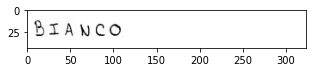

In [13]:
print("Prediction: " + pred_data)

plt.figure(figsize=(5, 5))
plt.imshow(img)